In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df = pd.read_csv('./datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# independent variable (input)
x = df.iloc[:, :8]
y = df.iloc[:, 8]

In [14]:
print(f"shape of x : {x.shape}")
print(f"shape of y : {y.shape}")
type(x)

shape of x : (768, 8)
shape of y : (768,)


pandas.core.frame.DataFrame

In [18]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [68]:
model = Sequential()

model.add(Dense(120, input_shape=(8,), activation='relu'))
model.add(Dense(60, activation='relu'))
# model.add(Dropout(0.2)
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, batch_size=64, epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 6ms/step - loss: 0.8627 - accuracy: 0.5951
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6528 - accuracy: 0.6615
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6196 - accuracy: 0.6966
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5948 - accuracy: 0.6914
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.6940
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5824 - accuracy: 0.7070
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.6784
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6377 - accuracy: 0.6823
Epoch 9/200
12/12 [==============================] - 0s 7ms/step - loss: 0.6087 - accuracy: 0.6966
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.6745
Epoch 11/

In [69]:
loss, accuracy = model.evaluate(x, y)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

24/24 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.8398
Test Accuracy: 83.98%


<function matplotlib.pyplot.show(close=None, block=None)>

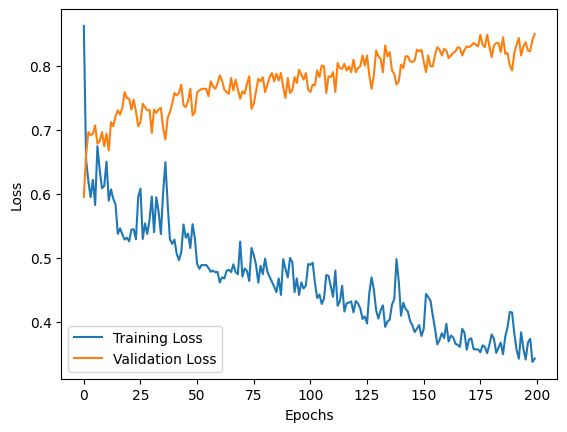

In [85]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Validation Loss')
plt.legend()
plt.show

In [86]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


Epoch [20/200], Loss: 0.5564
Epoch [40/200], Loss: 0.4420
Epoch [60/200], Loss: 0.4085
Epoch [80/200], Loss: 0.3798
Epoch [100/200], Loss: 0.3440
Epoch [120/200], Loss: 0.2946
Epoch [140/200], Loss: 0.2272
Epoch [160/200], Loss: 0.1508
Epoch [180/200], Loss: 0.0907
Epoch [200/200], Loss: 0.0496
Test Accuracy: 69.48%


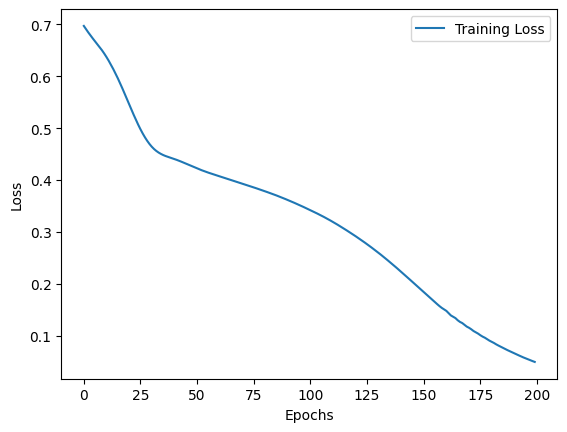

In [91]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./datasets/diabetes.csv')

# Independent variable (input)
x = df.iloc[:, :8].values  # Convert to numpy array
y = df.iloc[:, 8].values    # Convert to numpy array

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert the data to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)  # Reshape for output layer
x_test_tensor = torch.FloatTensor(x_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Define the neural network architecture
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 120)  # Input layer
        self.fc2 = nn.Linear(120, 60)  # Hidden layer
        self.fc3 = nn.Linear(60, 60)   # Hidden layer
        self.fc4 = nn.Linear(60, 1)     # Output layer
        self.activation = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.activation(self.fc4(x))
        return x

# Initialize the model, loss function, and optimizer
model = DiabetesModel()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 200
losses = []

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass
    y_pred = model(x_train_tensor)

    # Calculate loss
    loss = criterion(y_pred, y_train_tensor)
    losses.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:  # Print every 20 epochs
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    y_test_pred = model(x_test_tensor)
    y_test_pred = (y_test_pred > 0.5).float()  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = (y_test_pred.eq(y_test_tensor).sum().item()) / y_test_tensor.size(0) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plotting the loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses, label='Training Loss')
plt.legend()
plt.show()